In [19]:
# setting up packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

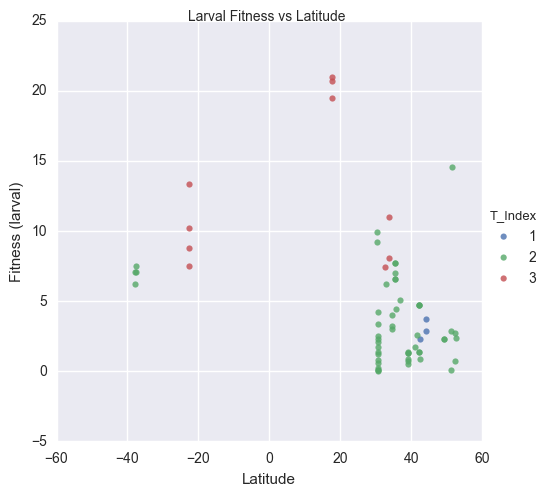

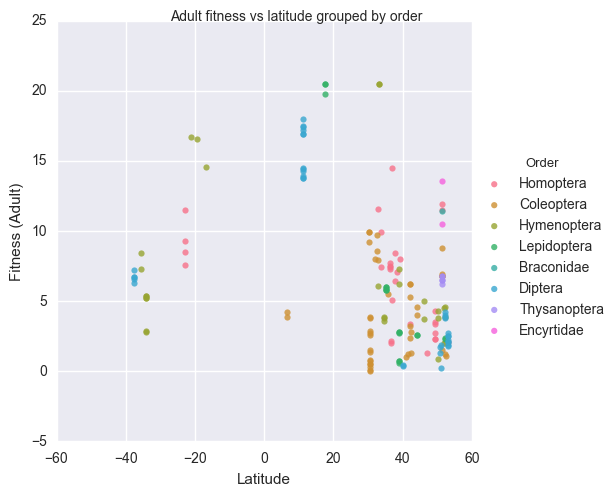

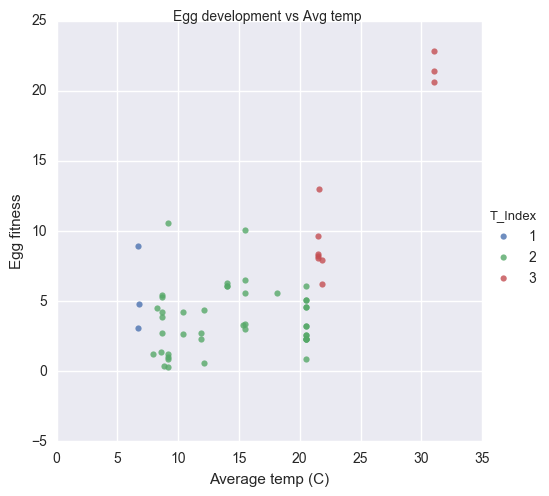

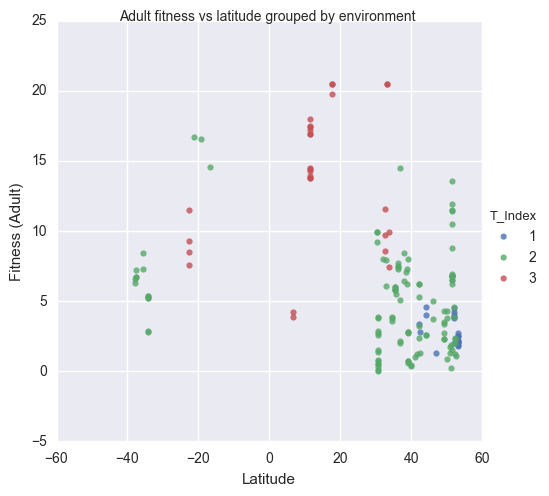

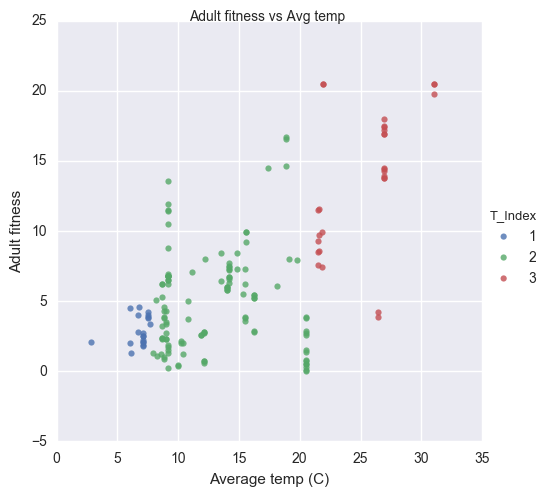

In [20]:
# bringing in dataset and the key into both pandas and numpy
data = pd.read_csv('419_Database.csv', encoding = "ISO-8859-1")


#initialdf = data[['BDT_Dist', 'lat_new', 'T_Index', 'Order', 'T_Avg', 'Genus', 'LT_Dist']].copy()
#initialdf['lat_new'].astype(str).astype(float)
#data.isnull().sum()

latvsLTdist = sns.lmplot("lat_new", "LT_Dist", hue="T_Index", data=data, fit_reg=False)
latvsLTdist.fig.suptitle('Larval Fitness vs Latitude')
latvsLTdist.set(xlabel="Latitude", ylabel="Fitness (larval)")

latvsBDTcOrder = sns.lmplot("lat_new", "BDT_Dist", hue="Order", data=data, fit_reg=False)
latvsBDTcOrder.fig.suptitle('Adult fitness vs latitude grouped by order')
latvsBDTcOrder.set(xlabel='Latitude', ylabel='Fitness (Adult)')
#latvsBDTcOrder.savefig('Adult fitness vs latitude grouped by order')

avgtvsLTdist = sns.lmplot("T_Avg ", "ET_Dist", hue='T_Index', data=data, fit_reg=False)
avgtvsLTdist.fig.suptitle('Egg development vs Avg temp')
avgtvsLTdist.set(xlabel='Average temp (C)', ylabel='Egg fitness')

latvsBDTdist = sns.lmplot("lat_new", "BDT_Dist", hue="T_Index", data=data, fit_reg=False)
latvsBDTdist.fig.suptitle('Adult fitness vs latitude grouped by environment')
latvsBDTdist.set(xlabel='Latitude', ylabel='Fitness (Adult)')

avgtvsLTdist = sns.lmplot("T_Avg ", "BDT_Dist", hue='T_Index', data=data, fit_reg=False)
avgtvsLTdist.fig.suptitle('Adult fitness vs Avg temp')
avgtvsLTdist.set(xlabel='Average temp (C)', ylabel='Adult fitness')
#avgtvsLTdist.savefig('Adult fitness vs Average temp')

# avgtvsLTdistreg = sns.regplot("T_Avg ", "BDT_Dist", scatter_kws=['r', 'g', 'b'], line_kws = 'cyan', data=data)
# avgtvsLTdistreg.fig.suptitle('Adult fitness vs Avg temp with regression')
# avgtvsLTdistreg.set(xlabel='Average temp (C)', ylabel='Adult fitness')

0.440474862253


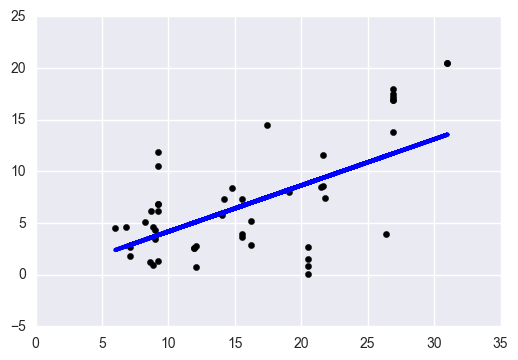

In [21]:
# maybe we can also do a linear regression for adult adaptation vs mean temperature
# lets try using scikitlearn's model
# week 7 monday has an example of Bing building a linear regression model using sci kit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# X: data
# y: target

modellr = LinearRegression(fit_intercept = True)


data.rename(columns={'T_Avg ': 'T_avg', 'BDT.C' : 'BDTC'}, inplace = True)

X = data.T_avg[:, np.newaxis]
y = data.BDT_Dist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
modellr.fit(X_train, y_train)

print(r2_score(y_test, modellr.predict(X_test)))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, modellr.predict(X_test), color='blue', linewidth=3)


In [23]:
#data.head


lat_new/BDT_Dist, T_index
lat_new/BDT_Dist, Order
lat_new/LT_Dist, T_index
lat_new/Lt_Dist, Order
T_Avg/BDT_Dist, T_index
T_Avg/LT_Dist, T_index

significance analysis

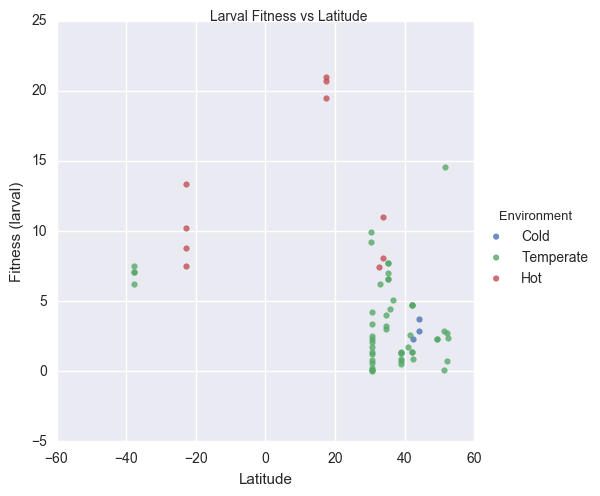

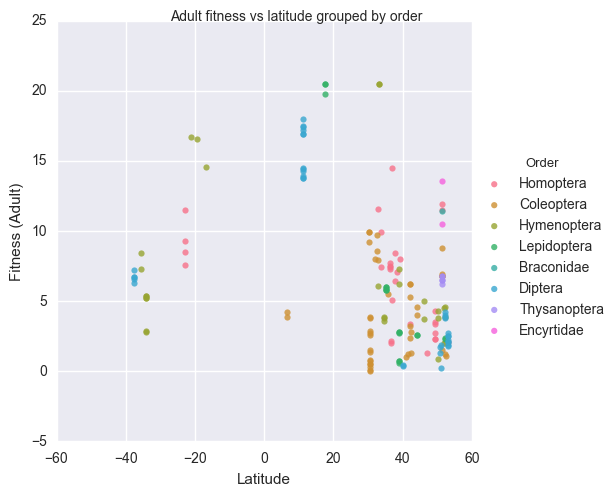

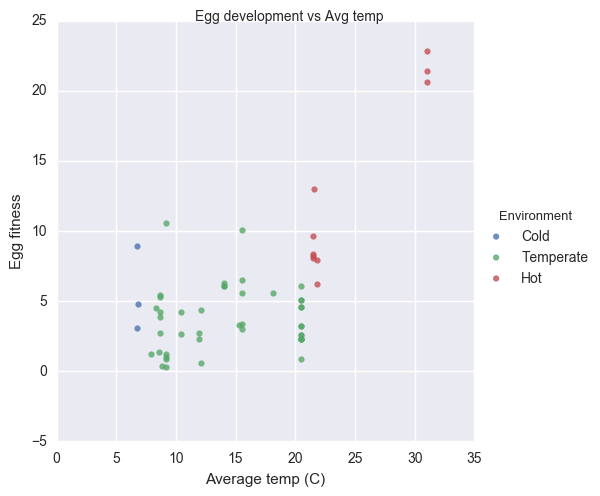

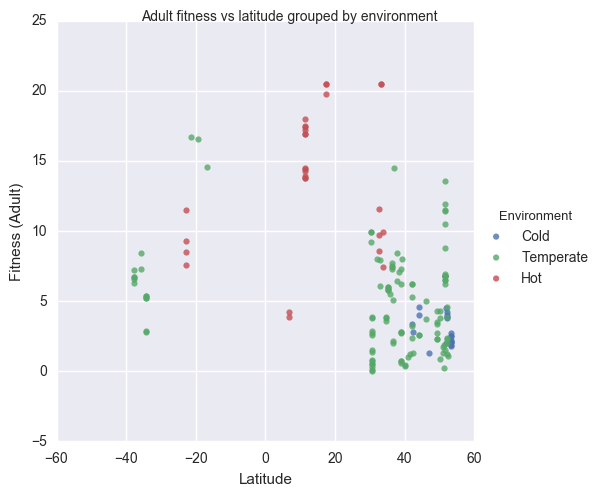

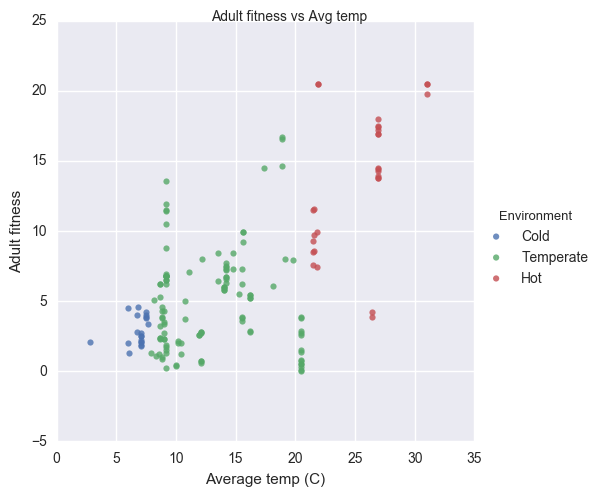

In [24]:
data2 = data

data2.rename(columns={'T_Index': 'Environment'}, inplace = True)
data2['Environment'] = data2['Environment'].map({1: 'Cold', 2: 'Temperate', 3:'Hot'})


#initialdf = data[['BDT_Dist', 'lat_new', 'T_Index', 'Order', 'T_Avg', 'Genus', 'LT_Dist']].copy()
#initialdf['lat_new'].astype(str).astype(float)
#data.isnull().sum()

latvsLTdist = sns.lmplot("lat_new", "LT_Dist", hue="Environment", data=data2, fit_reg=False)
latvsLTdist.fig.suptitle('Larval Fitness vs Latitude')
latvsLTdist.set(xlabel="Latitude", ylabel="Fitness (larval)")
latvsLTdist.savefig('Larval fitness vs latitude')

latvsBDTcOrder = sns.lmplot("lat_new", "BDT_Dist", hue="Order", data=data2, fit_reg=False)
latvsBDTcOrder.fig.suptitle('Adult fitness vs latitude grouped by order')
latvsBDTcOrder.set(xlabel='Latitude', ylabel='Fitness (Adult)')
latvsBDTcOrder.savefig('Adult fitness vs latitude grouped by order')

avgtvsLTdist = sns.lmplot("T_avg", "ET_Dist", hue='Environment', data=data2, fit_reg=False)
avgtvsLTdist.fig.suptitle('Egg development vs Avg temp')
avgtvsLTdist.set(xlabel='Average temp (C)', ylabel='Egg fitness')
avgtvsLTdist.savefig('egg development vs avg temp')

latvsBDTdist = sns.lmplot("lat_new", "BDT_Dist", hue="Environment", data=data2, fit_reg=False)
latvsBDTdist.fig.suptitle('Adult fitness vs latitude grouped by environment')
latvsBDTdist.set(xlabel='Latitude', ylabel='Fitness (Adult)')
latvsBDTdist.savefig('Adult fitness latitiude')

avgtvsLTdist = sns.lmplot("T_avg", "BDT_Dist", hue='Environment', data=data2, fit_reg=False)
avgtvsLTdist.fig.suptitle('Adult fitness vs Avg temp')
avgtvsLTdist.set(xlabel='Average temp (C)', ylabel='Adult fitness')
avgtvsLTdist.savefig('Adult fitness vs Average temp')

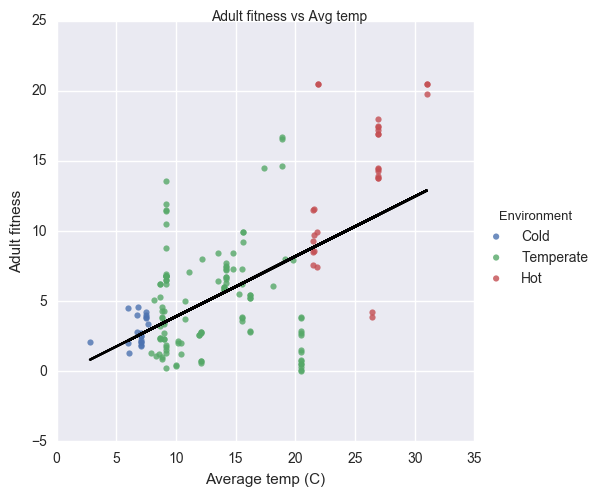

In [91]:
lrdata = pd.DataFrame()

X_testsqueeze = np.squeeze(X_test)
lrdata['X_test'] = X_testsqueeze
lrdata['y_predict'] = modellr.predict(X_test)
lrdata['y_test'] = y_test
xline = lrdata['X_test'].values
yline = lrdata['y_predict'].values


scatter = sns.lmplot("T_avg", "BDT_Dist", hue='Environment', data=data2, fit_reg=False)
plt.plot(xline, yline, c = 'k')
scatter.fig.suptitle('Adult fitness vs Avg temp')
scatter.set(xlabel='Average temp (C)', ylabel='Adult fitness')
scatter.savefig('Adult fitness vs Average temp with regression')